# MO431A - Tarefa 1

### 1- Leia o arquivo dados.npy

In [89]:
# carregamento de bibliotecas

import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt

In [90]:
# carregando o arquivo de dados
X = np.load("dados.npy")

In [91]:
# validando as dimensões da matrix X dos dados
X.shape

(10500, 784)

### 2 - Imprima a imagem dos 3 primeiros dígitos

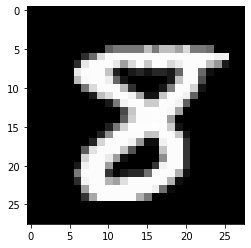

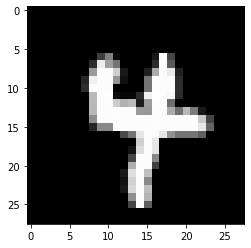

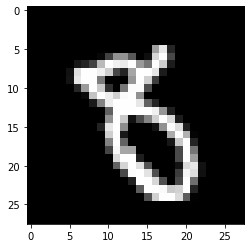

In [92]:
for i in range(3):
    plt.figure()
    plt.imshow(X[i].reshape(28,28), cmap = 'gray')

### 3 - Faça a fatoração SVD da matriz X

In [93]:
# normalização para média zero
X_norm = X - np.mean(X, axis = 0)

In [94]:
# calculando SVD com full_matrix
U_full, D_full, VT_full = np.linalg.svd(X_norm, full_matrices = True)

# calculando SVD compacta
U_cpct, D_cpct, VT_cpct = np.linalg.svd(X_norm, full_matrices = False)

In [95]:
# dimensões das matrizes SVD com full_matrix
U_full.shape, D_full.shape, VT_full.shape

((10500, 10500), (784,), (784, 784))

In [96]:
# dimensões das matrizes SVD compacta
U_cpct.shape, D_cpct.shape, VT_cpct.shape

((10500, 784), (784,), (784, 784))

### 4 - SVD Truncado

#### Cálculos utilizando os resultados do SVD anteriores. Sem utilizar funções pré-definidas para SVD truncado

In [97]:
# a partir das componentes calculadas acima no SVD compacto, fazer o SVD truncado com 100 dimensões
dim = 100
U_trunc = U_cpct[:, 0:dim]
D_trunc = D_cpct[0:dim]
VT_trunc = VT_cpct[0:dim, :]

In [98]:
U_trunc.shape, D_trunc.shape, VT_trunc.shape

((10500, 100), (100,), (100, 784))

In [99]:
# matrix X projetada no espaço de 100 dimensões
X_projetada = U_trunc * D_trunc
X_projetada.shape

(10500, 100)

In [100]:
# matriz reconstruída atravez do SVD truncado
X_reconstruida = np.dot(X_projetada, VT_trunc)
X_reconstruida.shape

(10500, 784)

#### Cálculos utilizando a função TruncatedSVD do SKLEARN

In [101]:
# cálculo do SVD truncado com 100 dimensões
svd_trunc = TruncatedSVD(n_components = dim, random_state = 42)

In [102]:
# cálculo da matriz X projetada no espaço de 100 dimensões
X_projetada_2 = svd_trunc.fit_transform(X_norm)

# dimensões da matriz X projetada
X_projetada_2.shape

(10500, 100)

In [103]:
# matriz reconstruída atravez da função TruncatedSVD
X_reconstruida_2 = svd_trunc.inverse_transform(X_projetada_2)
X_reconstruida_2.shape

(10500, 784)

#### Cálculos utilizando PCA do SKLEARN

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components = dim, random_state = 42)

In [105]:
X_projetada_3 = pca.fit_transform(X_norm)

X_projetada_3.shape

(10500, 100)

In [106]:
# matriz reconstruída atravez da função pca
X_reconstruida_3 = pca.inverse_transform(X_projetada_3)
X_reconstruida_3.shape

(10500, 784)

### 5 - Imprima a imagem reconstruída dos 3 primeiros dígitos

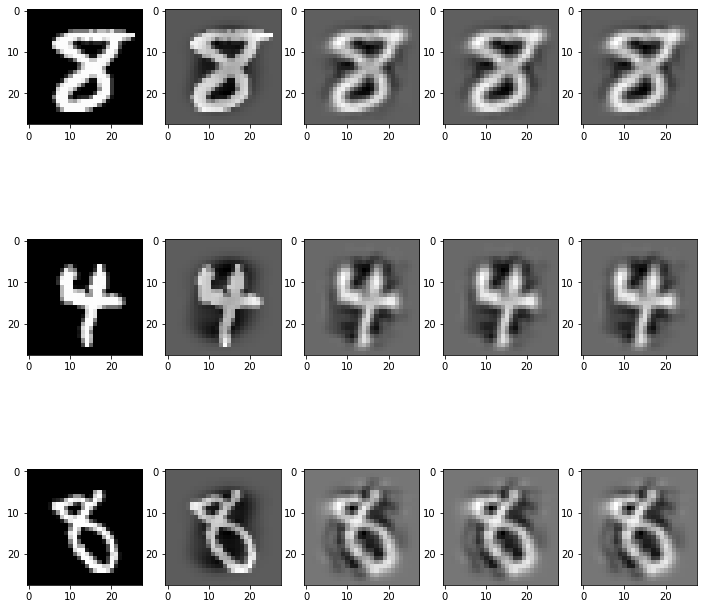

In [107]:
# comparação entre as imagens originais (primeira coluna),
# normalizadas com média zero (segunda coluna)
# e reconstruídas sem o uso de função pronta (terceira coluna),
# com o uso da função TruncatedSVD (quarta coluna)
# e com uso de pca (quinta coluna)

fig = plt.figure(figsize=(12, 12))
p = 1
for i in range(3):
    # imagem original
    img1 = X[i].reshape(28,28)
    fig.add_subplot(3, 5, p)
    plt.imshow(img1, cmap = 'gray')
    
    # imagem original normalizada com média zero
    img2 = X_norm[i].reshape(28,28)
    fig.add_subplot(3, 5, p + 1)
    plt.imshow(img2, cmap = 'gray')
    
    # imagem reconstruída a partir do SVD truncado calculado
    img3 = X_reconstruida[i].reshape(28,28)
    fig.add_subplot(3, 5, p + 2)
    plt.imshow(img3, cmap = 'gray')

    # imagem reconstruída com o uso da função TruncatedSVD
    img4 = X_reconstruida_2[i].reshape(28,28)
    fig.add_subplot(3, 5, p + 3)
    plt.imshow(img3, cmap = 'gray')
    
    # imagem reconstruída com o uso da função pca
    img5 = X_reconstruida_3[i].reshape(28,28)
    fig.add_subplot(3, 5, p + 4)
    plt.imshow(img3, cmap = 'gray')
    
    p = p + 5

plt.show()

### 6 - Imprima os 3 primeiros eigen-dígitos

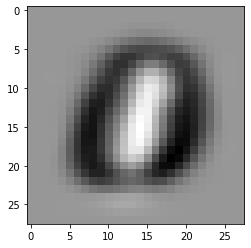

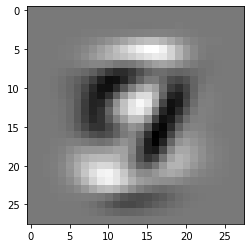

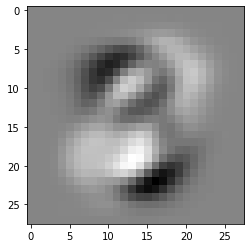

In [108]:
# eigen-dígitos são as linhas da matrix VT de 784 linhas por 784 colunas
# no caso esão sendo impressas as 3 primeiras linhas da VT do SVD compacto
for i in range(3):
    plt.figure()
    plt.imshow(VT_cpct[i].reshape(28,28), cmap = 'gray')

### 7 - Decidindo o número de dimensões

#### 7.1 - Quantas dimensões manter usando a regra de usar singular values maior que 1

In [109]:
# selecionar as linhas da matriz D que tiverem single values maiores que 1
# np.where abaixo filtra todos os valores de D que forem maiores que 1 e retorna os índices destas linhas
num_dim = np.where( D_cpct > 1 )[0].shape[0]
print("O número de dimensões por esta regra é:", num_dim)

O número de dimensões por esta regra é: 671


#### 7.2 - Quantas dimensões manter para capturar 80% da variância dos dados

In [110]:
# por essa regra o número de dimensões será aquele que somar 80% da variância
# total acumulada nos single values da matriz D

# variância total
var_total = D_cpct.sum()

# fazer a soma das variâncias linha a linha até que atinja 80% da total
for i in range(D_cpct.shape[0]):
    var_trunc = D_cpct[:i].sum() / var_total
    if var_trunc >= 0.8:
        break
print("Variância acumulada com", i, "dimensões:", var_trunc)

Variância acumulada com 235 dimensões: 0.8004557116328009


In [150]:
# uma forma, que parece ser a mais correta de se calcular o número de dimensões

# variância total
media = np.mean(D_cpct)
var_total = np.mean((D_cpct - media) ** 2)
vetor_variancias = ((D_cpct) ** 2) / 783

# fazer a soma das variâncias linha a linha até que atinja 80% da total
for i in range(vetor_variancias.shape[0]):
    var_trunc = vetor_variancias[:i].sum() / var_total
    if var_trunc >= 0.8:
        break
print("Variância acumulada com", i, "dimensões:", var_trunc)

Variância acumulada com 18 dimensões: 0.8002950894424015


In [145]:
(D_cpct ** 2) / 783

array([4.48876423e+06, 3.27387284e+06, 2.79815701e+06, 2.46439899e+06,
       2.23261624e+06, 1.95167945e+06, 1.52951830e+06, 1.33591577e+06,
       1.27314608e+06, 1.09124107e+06, 9.62705126e+05, 9.20088603e+05,
       7.86081981e+05, 7.66494600e+05, 7.29371620e+05, 6.86008588e+05,
       6.22214684e+05, 5.86589909e+05, 5.42084809e+05, 5.23334395e+05,
       4.82957576e+05, 4.65504332e+05, 4.52368602e+05, 4.23791988e+05,
       4.05459203e+05, 3.86859250e+05, 3.71455053e+05, 3.58437929e+05,
       3.38523517e+05, 3.20349213e+05, 3.00341340e+05, 2.97256013e+05,
       2.75850586e+05, 2.67148033e+05, 2.54432486e+05, 2.46655842e+05,
       2.31744058e+05, 2.22498664e+05, 2.20105974e+05, 2.18848862e+05,
       2.08711238e+05, 2.01722001e+05, 1.88815352e+05, 1.82091014e+05,
       1.75565143e+05, 1.71679730e+05, 1.65298321e+05, 1.58155596e+05,
       1.54763243e+05, 1.48277359e+05, 1.46528021e+05, 1.44262852e+05,
       1.38909311e+05, 1.31583669e+05, 1.30498798e+05, 1.25048596e+05,
      

#### 7.3 - Quantas dimensões manter para capturar 95% da variância dos dados

In [68]:
# por essa regra o número de dimensões será aquele que somar 95% da variância
# total acumulada nos single values da matriz D

# variância total
var_total = D_cpct.sum()

# fazer a soma das variâncias linha a linha até que atinja 95% da total
for i in range(D_cpct.shape[0]):
    var_trunc = D_cpct[:i].sum() / var_total
    if var_trunc >= 0.95:
        break
print("Variância acumulada com", i, "dimensões:", var_trunc)

Variância acumulada com 426 dimensões: 0.9502576388383301


In [87]:
# comparando com o PCA para 80% da variância
from sklearn.decomposition import PCA
pca = PCA(.8)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.shape)

[0.09794457 0.07143571 0.06105562 0.05377304 0.04871555 0.04258553
 0.033374   0.0291496  0.02777997 0.02381081 0.02100617 0.02007628
 0.01715226 0.01672487 0.01591485 0.01496867 0.01357669 0.01279936
 0.01182826 0.01141913 0.01053811 0.01015728 0.00987066 0.00924712
 0.0088471  0.00844125 0.00810513 0.00782109 0.00738656 0.00699
 0.00655343 0.00648611 0.00601904 0.00582915 0.0055517  0.00538202
 0.00505664 0.00485491 0.0048027  0.00477527 0.00455407 0.00440156
 0.00411994]
(43,)


In [88]:
pca.explained_variance_ratio_.sum()

0.8008817322938911

In [80]:
# comparando com o PCA para 95% da variância
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.shape)

[0.09794457 0.07143571 0.06105562 0.05377304 0.04871555 0.04258553
 0.033374   0.0291496  0.02777997 0.02381081 0.02100617 0.02007628
 0.01715226 0.01672487 0.01591485 0.01496867 0.01357669 0.01279936
 0.01182826 0.01141913 0.01053811 0.01015728 0.00987066 0.00924712
 0.0088471  0.00844125 0.00810513 0.00782109 0.00738656 0.00699
 0.00655343 0.00648611 0.00601904 0.00582915 0.0055517  0.00538202
 0.00505664 0.00485491 0.0048027  0.00477527 0.00455407 0.00440156
 0.00411994 0.00397322 0.00383082 0.00374604 0.0036068  0.00345095
 0.00337692 0.0032354  0.00319723 0.00314781 0.00303099 0.00287115
 0.00284748 0.00272855 0.00270339 0.00257159 0.00253506 0.00248335
 0.00242676 0.00238244 0.00226023 0.00218617 0.00215364 0.00210043
 0.00205046 0.00198162 0.00187381 0.00187045 0.00184899 0.00181154
 0.00177665 0.0017685  0.00167694 0.00162072 0.00161096 0.00152841
 0.00148826 0.00146375 0.00142468 0.00140992 0.00137341 0.00136753
 0.00131261 0.00130143 0.00128252 0.00124864 0.00121952 0.0011968

In [78]:
pca.explained_variance_ratio_.sum()

0.9500413457056949